In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn import datasets
from sklearn import metrics
from sklearn.model_selection import cross_validate

In [2]:
# loading California Housing dataset
cal_d  = datasets.fetch_california_housing()

In [3]:
# Description of the dataset
print(cal_d.DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block
        - HouseAge      median house age in block
        - AveRooms      average number of rooms
        - AveBedrms     average number of bedrooms
        - Population    block population
        - AveOccup      average house occupancy
        - Latitude      house block latitude
        - Longitude     house block longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
http://lib.stat.cmu.edu/datasets/

The target variable is the median house value for California districts.

This dataset was derived from the 1990 U.S. census, using one row per census
block group. A block group is the smallest geographical unit for which the U.S.
Census Bur

In [4]:
# Feature Names in dataset
cal_d.feature_names

['MedInc',
 'HouseAge',
 'AveRooms',
 'AveBedrms',
 'Population',
 'AveOccup',
 'Latitude',
 'Longitude']

In [5]:
cal_d.data.shape

(20640, 8)

In [6]:
cal_d.target.shape

(20640,)

In [7]:
# a look over the data
data = pd.DataFrame(cal_d.data, columns = cal_d.feature_names)
data['Med_house_val'] = cal_d.target
data.head(10)

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Med_house_val
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
5,4.0368,52.0,4.761658,1.103627,413.0,2.139896,37.85,-122.25,2.697
6,3.6591,52.0,4.931907,0.951362,1094.0,2.128405,37.84,-122.25,2.992
7,3.1200,52.0,4.797527,1.061824,1157.0,1.788253,37.84,-122.25,2.414
8,2.0804,42.0,4.294118,1.117647,1206.0,2.026891,37.84,-122.26,2.267
9,3.6912,52.0,4.970588,0.990196,1551.0,2.172269,37.84,-122.25,2.611


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
MedInc           20640 non-null float64
HouseAge         20640 non-null float64
AveRooms         20640 non-null float64
AveBedrms        20640 non-null float64
Population       20640 non-null float64
AveOccup         20640 non-null float64
Latitude         20640 non-null float64
Longitude        20640 non-null float64
Med_house_val    20640 non-null float64
dtypes: float64(9)
memory usage: 1.4 MB


In [9]:
data.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Med_house_val
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


In [10]:
# fig = plt.subplots(figsize = (10,10))
# sns.heatmap(X.corr(), vmax = 1, vmin = -1, square = True)


# correlation matrix
data.corr()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Med_house_val
MedInc,1.000000,-0.119034,0.326895,-0.062040,0.004834,0.018766,-0.079809,-0.015176,0.688075
HouseAge,-0.119034,1.000000,-0.153277,-0.077747,-0.296244,0.013191,0.011173,-0.108197,0.105623
AveRooms,0.326895,-0.153277,1.000000,0.847621,-0.072213,-0.004852,0.106389,-0.027540,0.151948
AveBedrms,-0.062040,-0.077747,0.847621,1.000000,-0.066197,-0.006181,0.069721,0.013344,-0.046701
Population,0.004834,-0.296244,-0.072213,-0.066197,1.000000,0.069863,-0.108785,0.099773,-0.024650
AveOccup,0.018766,0.013191,-0.004852,-0.006181,0.069863,1.000000,0.002366,0.002476,-0.023737
Latitude,-0.079809,0.011173,0.106389,0.069721,-0.108785,0.002366,1.000000,-0.924664,-0.144160
Longitude,-0.015176,-0.108197,-0.027540,0.013344,0.099773,0.002476,-0.924664,1.000000,-0.045967
Med_house_val,0.688075,0.105623,0.151948,-0.046701,-0.024650,-0.023737,-0.144160,-0.045967,1.000000


## Visualization

<br><br><br><br>
* Scatterplot - Median_income_in_block vs Median_house_value_in_block

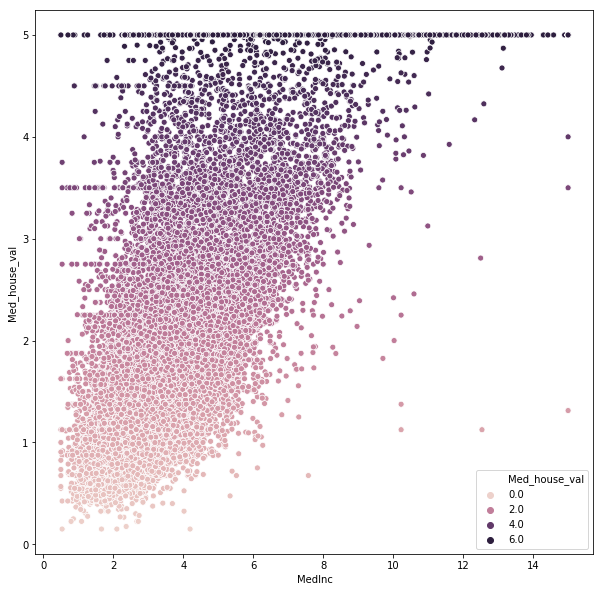

In [11]:
fig = plt.subplots(figsize = (10,10))
# sns.set(color_codes = True)
sns.scatterplot(x = 'MedInc', y = 'Med_house_val', data = data, hue = 'Med_house_val' )

<br><br>
* Median_income_in_block vs Median_house_value_in_block regression plot

/home/pacific/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


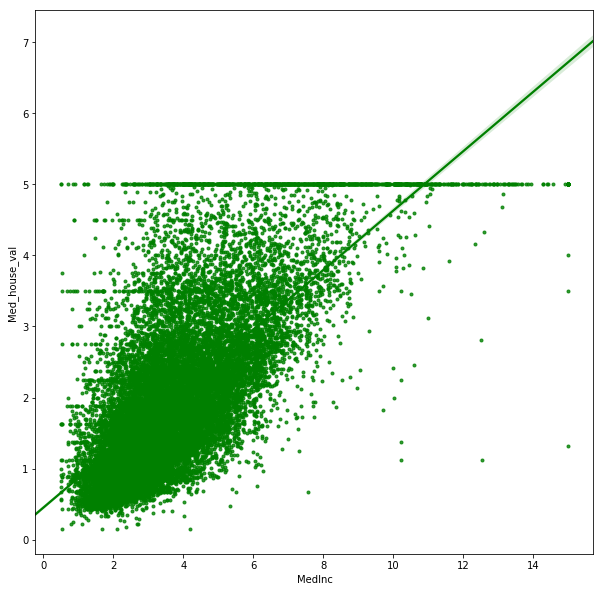

In [12]:
fig = plt.subplots(figsize = (10,10))
# sns.set(color_codes = True)
sns.regplot(x = 'MedInc', y = 'Med_house_val', data = data, marker = '.', color = 'g' )

<br><br><br><br>
* ScatterPlot Median_house_age vs Median_house_value regression

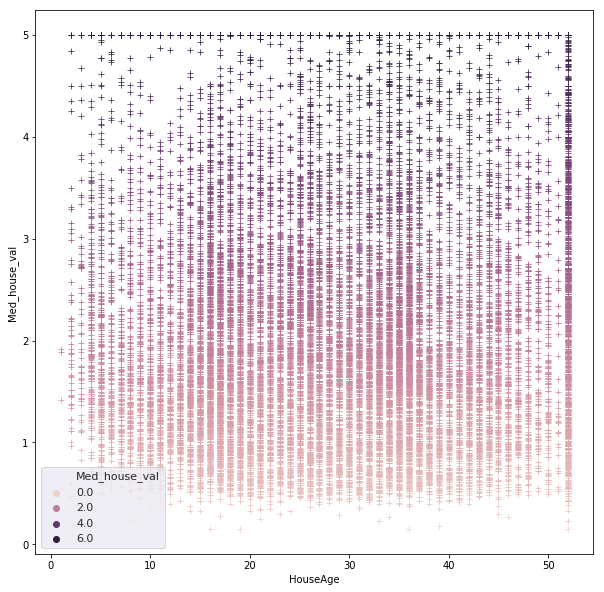

In [13]:
fig = plt.subplots(figsize = (10,10))
sns.set(color_codes = True)
sns.scatterplot(x = 'HouseAge', y = 'Med_house_val', data = data, hue = 'Med_house_val', marker = '+')

<br><br><br><br>
* ScatterPlot Average_number_of_rooms vs Median_house_value

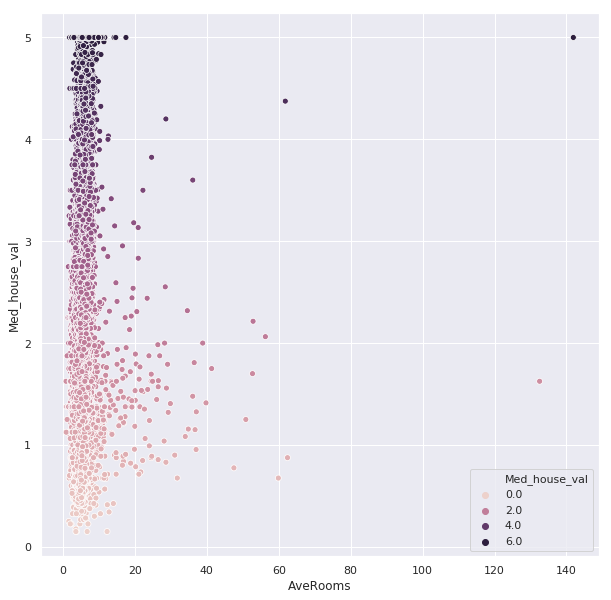

In [14]:
fig = plt.subplots(figsize = (10,10))
sns.set(color_codes = True)
sns.scatterplot(x = 'AveRooms', y = 'Med_house_val', data = data, hue = 'Med_house_val')

<br><br><br><br>
* ScatterPlot Average_number_of_bedrooms vs Median_value_of_house

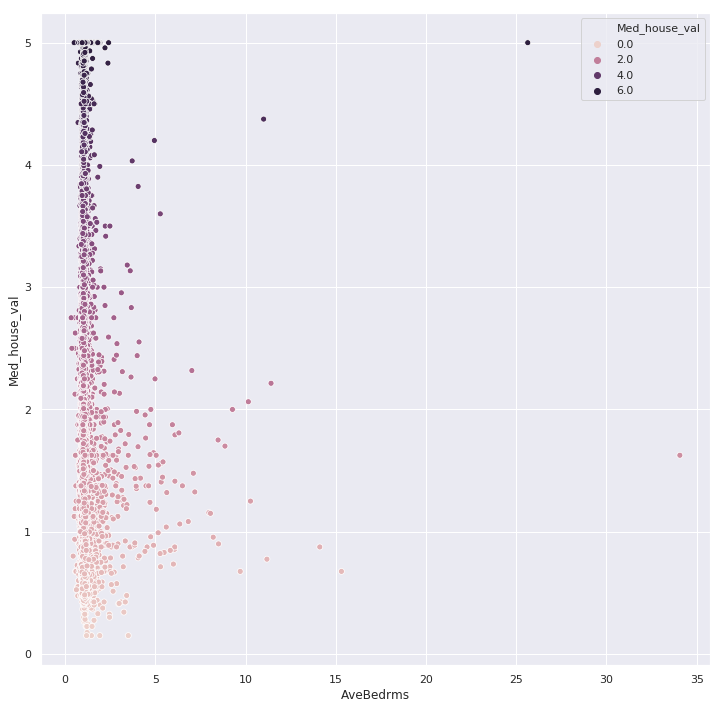

In [15]:
fig = plt.subplots(figsize = (12,12))
sns.set(color_codes = True)
sns.scatterplot(x = 'AveBedrms', y = 'Med_house_val', data = data, hue = 'Med_house_val')

<br><br><br><br>
* ScatterPlot block_population vs Median_value_of_house

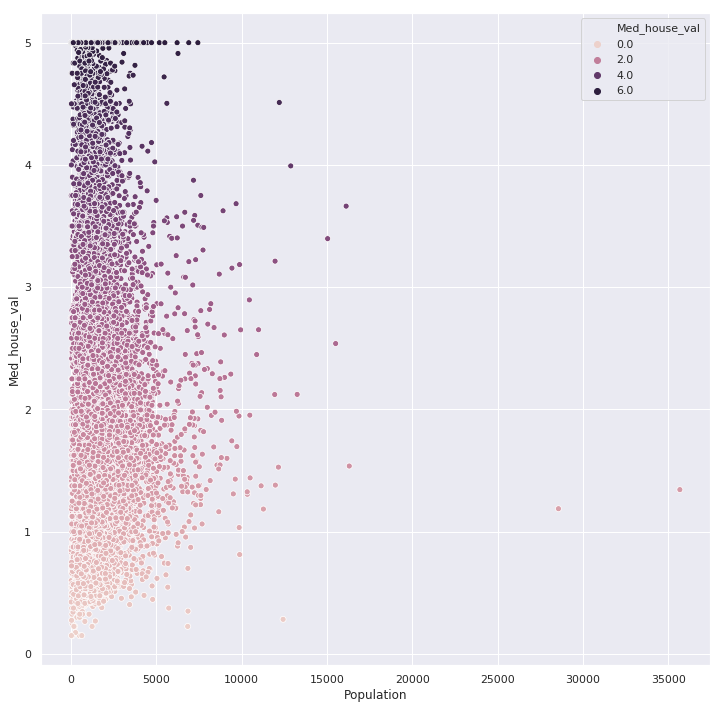

In [16]:
fig = plt.subplots(figsize = (12, 12))
sns.scatterplot(x = 'Population', y = 'Med_house_val', data = data, hue = 'Med_house_val')

<br><br><br><br>
* ScatterPlot Average_house_occupancy vs Median_value_of_house

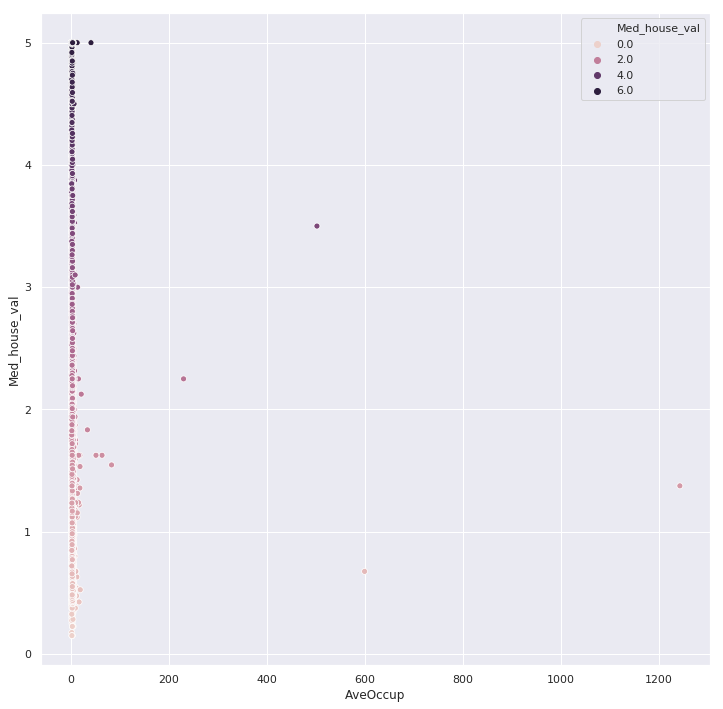

In [17]:
fig = plt.subplots(figsize = (12, 12))
sns.scatterplot(x = 'AveOccup', y = 'Med_house_val', data = data, hue = 'Med_house_val')

<br><br><br><br>
* ScatterPlot Latitude_of_block vs Median_value_of_house

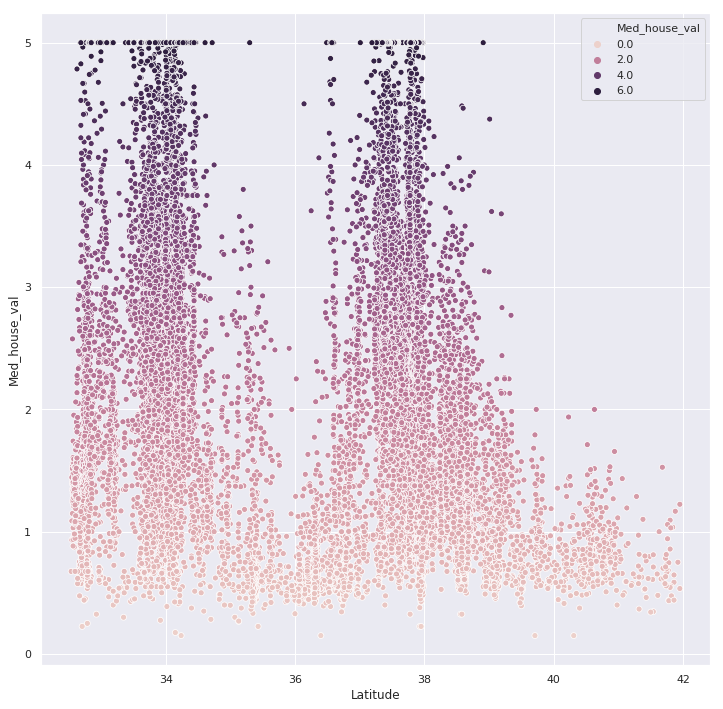

In [18]:
fig = plt.subplots(figsize = (12, 12))
sns.scatterplot(x = 'Latitude', y = 'Med_house_val', data = data, hue = 'Med_house_val')

<br><br><br><br>
* ScatterPlot Longitude_of_block vs Median_value_of_house

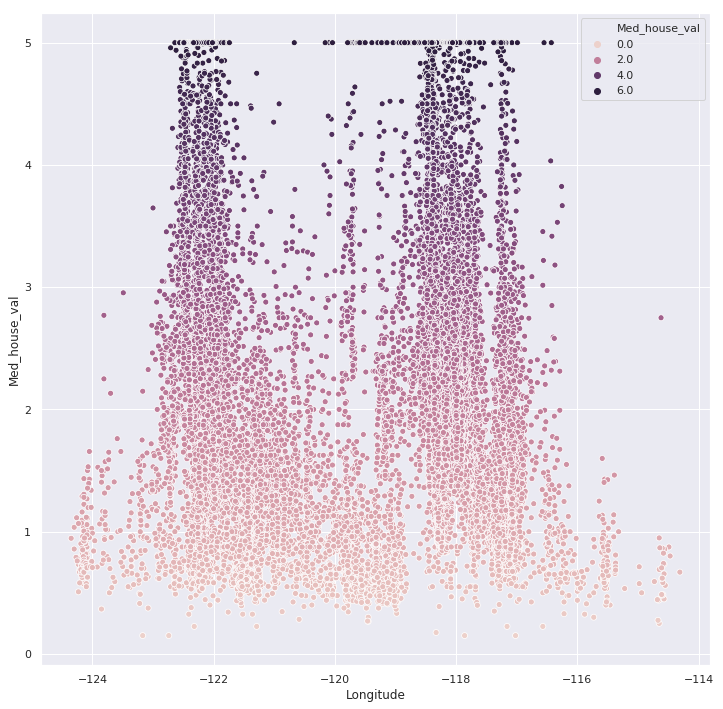

In [19]:
fig = plt.subplots(figsize = (12, 12))
sns.scatterplot(x = 'Longitude', y = 'Med_house_val', data = data, hue = 'Med_house_val')

In [20]:
# making scorer
scorer = metrics.make_scorer(metrics.mean_squared_error, greater_is_better=True)

## Linear Regression

In [21]:
lr = LinearRegression()

In [22]:
# cross validating for linear regression
error_lr = cross_validate(lr, data[['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']], data[['Med_house_val']], scoring = scorer, cv = 7)

## Decision Tree

In [23]:
tree = DecisionTreeRegressor(random_state = 1)

In [24]:
# cross validating for Decision Tree
error_dt = cross_validate(tree, data[['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']], data[['Med_house_val']], scoring = scorer, cv = 7)

## Random Forest

In [25]:
rf = RandomForestRegressor(n_estimators = 5, n_jobs = -1, random_state = 1)

In [27]:
# cross validating for Random Forest
error_rf = cross_validate(rf, data[['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']], data.Med_house_val, scoring = scorer, cv = 7)

## Mean of test_mse resulted in KFold Cross Validation
* LinearRegression
* DecisionTreeRegressor
* RandomForestRegressor

In [28]:
print(error_lr['test_score'].mean())
print(error_dt['test_score'].mean())
print(error_rf['test_score'].mean())

0.5550162785002415
0.8557504734763347
0.5153928747551528


<br><br><br><br>
### ScatterPlot actual median_value_of_block vs Predicted by RandomForestRegressor

In [29]:
rf.fit(data[['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']], data.Med_house_val)
predicted = rf.predict(data[['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']])

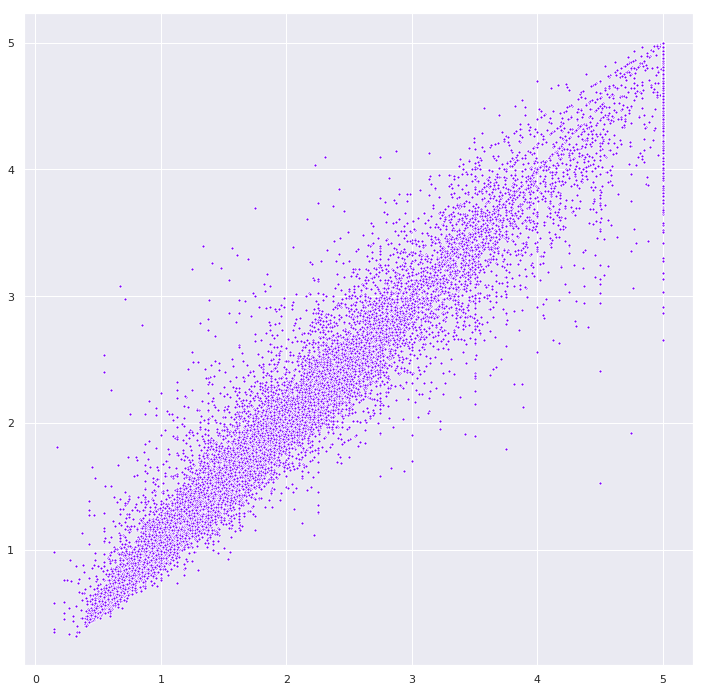

In [30]:
plt.subplots(figsize = (12, 12))
sns.scatterplot(x = (np.array(data.Med_house_val)) , y = (predicted), marker = '.', color = '#7F00FF')